In [1]:
import numpy as np
import matplotlib.pyplot as plt
import juliet

/home/jayshil/anaconda3/lib/python3.8/site-packages/autograd/numpy/numpy_wrapper.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_types = {_np.int, _np.int8, _np.int16, _np.int32, _np.int64, _np.integer}


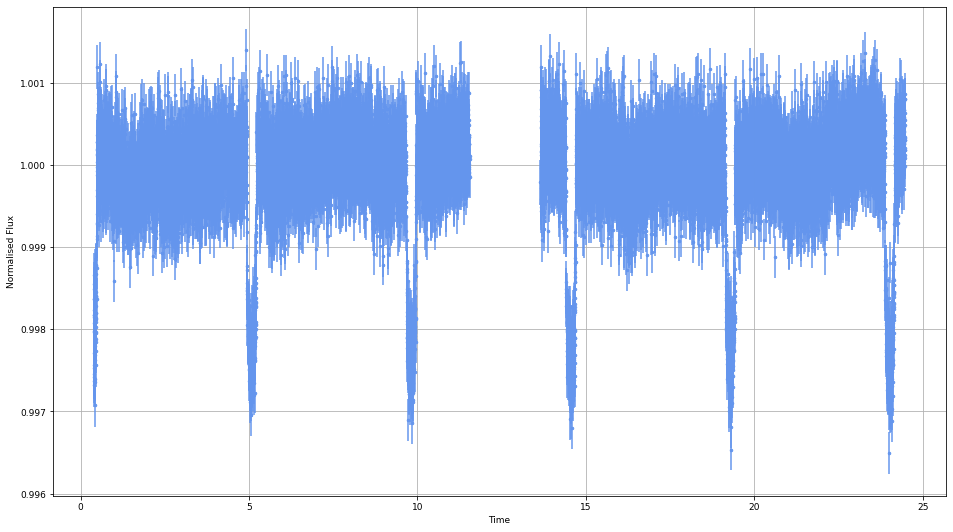

In [2]:
tim, fl, fle = {}, {}, {}
tim['visit1'], fl['visit1'], fle['visit1'] = np.loadtxt('kelt11_1.dat', usecols=(0,1,2), unpack=True)

# Let's see the data
plt.figure(figsize=(16,9))
plt.errorbar(tim['visit1'], fl['visit1'], yerr=fle['visit1'], fmt='.', c='cornflowerblue')
plt.xlabel('Time')
plt.ylabel('Normalised Flux')
plt.grid()

In [3]:
# Instrumental parameters
params_ins = ['mdilution_visit1', 'mflux_visit1', 'sigma_w_visit1']
dist_ins = ['fixed', 'normal', 'loguniform']
hyper_ins = [1., [0., 0.1], [0.1, 10000.]]

# GP Params
params_gp = ['GP_sigma_visit1', 'GP_timescale_visit1', 'GP_rho_visit1']
dist_gp = ['loguniform', 'loguniform', 'loguniform']
hyper_gp = [[1e-5, 10000.], [1e-3, 1e2], [1e-3, 1e2]]

params_P = ['P_p1', 't0_p1', 'r1_p1', 'r2_p1', 'q1_visit1', 'q2_visit1', 'sesinomega_p1', 'secosomega_p1', 'a_p1']
dist_P = ['fixed', 'normal', 'uniform', 'uniform', 'uniform', 'uniform', 'fixed', 'fixed', 'loguniform']
hyper_P = [4.7362050, [0.5011, 0.1], [0.,1.], [0.,1.], [0.,1.], [0.,1.], 0.1753, -0.0226, [1.,100.]]

params = params_ins + params_gp + params_P
dist = dist_ins + dist_gp + dist_P
hyper = hyper_ins + hyper_gp + hyper_P

priors = {}

for i, j, k in zip(params, dist, hyper):
    priors[i] = {}
    priors[i]['distribution'], priors[i]['hyperparameters'] = j, k

In [4]:
dataset = juliet.load(priors=priors, t_lc=tim, y_lc=fl, yerr_lc=fle, GP_regressors_lc=tim, out_folder='juliet/')
results = dataset.fit(sampler = 'dynamic_dynesty', bound = 'single', n_effective = 100, use_stop = False, nthreads = 4, verbose=True)

TypeError: DynamicNestedSampler() got an unexpected keyword argument 'nlive_init'